In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16.18033, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_data(pre, pdb_list):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        name = p.lower()[:4]
        for i in range(20):
            for ii in range(3):
                location = pre + f"all_simulations/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

In [3]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list)
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv")

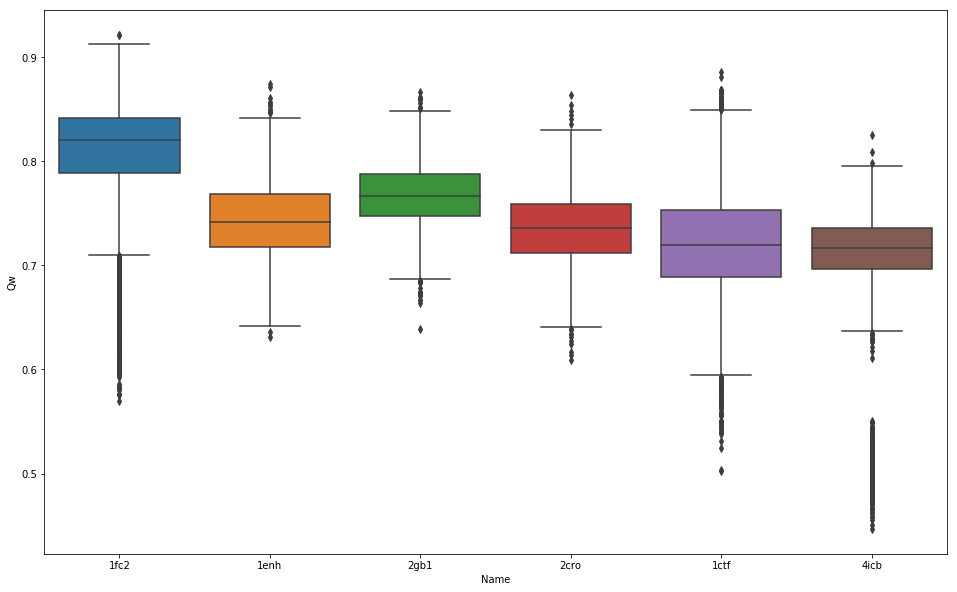

In [6]:
sns.boxplot("Name", "Qw", data=data)

In [ ]:
# data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_no_gamma.csv", index_col=0)
# data2 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_old_gamma.csv", index_col=0)
# data3 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_new_gamma.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="no_gamma")
#               , data3.assign(Scheme="new_gamma"), data2.assign(Scheme="old_gamma")])
# sns.boxplot("Name", "Qw", hue="Scheme", data=d)